# Exercise 10-1: Create a linear regression

## Get the data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
fish = pd.read_csv('Fish.csv')

In [3]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Clean the data

In [4]:
# 4 & 5 read the info.txt file and rename the Length columns so they're more descriptive

fish.rename(columns = {'Length1': 'VerticalLength',
                      'Length2': 'DiagonalLength',
                      'Length3': 'CrossLength'}, inplace = True)

fish.info()

fish.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         159 non-null    object 
 1   Weight          159 non-null    float64
 2   VerticalLength  159 non-null    float64
 3   DiagonalLength  159 non-null    float64
 4   CrossLength     159 non-null    float64
 5   Height          159 non-null    float64
 6   Width           159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Identify a correlation

In [5]:
# 6 get the correlation data for the Weight column

fish.corr()[['Weight']]

,Weight
Weight,1.000000
VerticalLength,0.915712
DiagonalLength,0.918618
CrossLength,0.923044
Height,0.724345
Width,0.886507


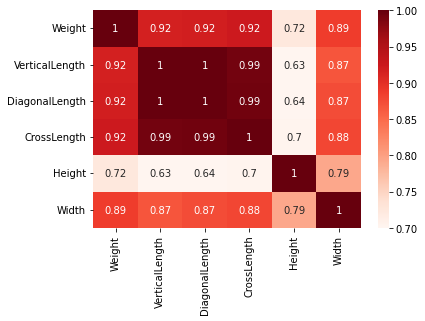

In [6]:
# 7 create a heatmap for the correlation data

sns.heatmap(data = fish.corr(), cmap = 'Reds', annot = True, vmin = .70, vmax = 1.0);

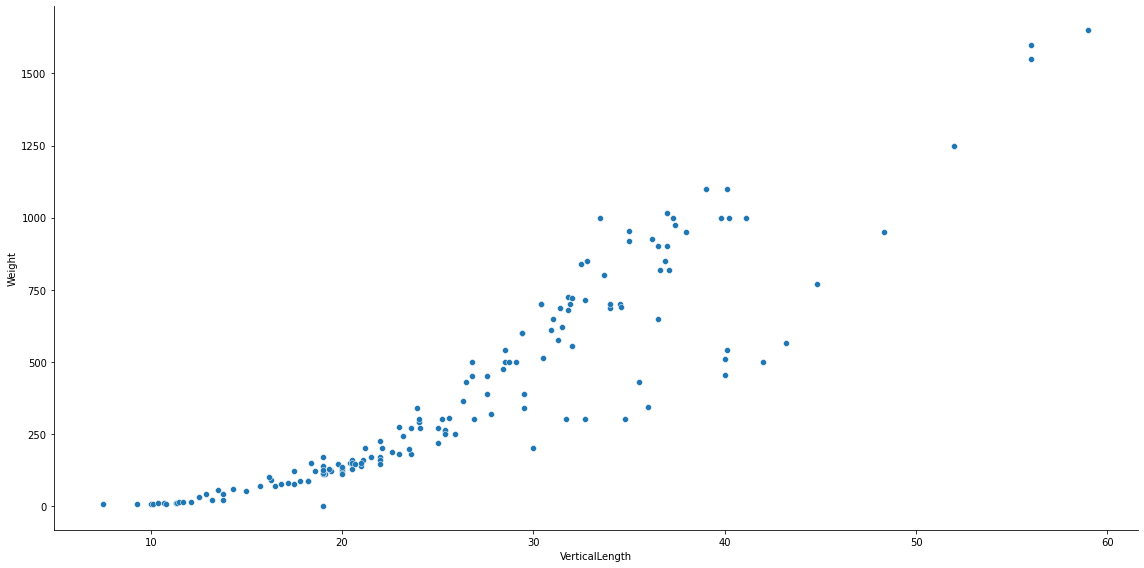

In [7]:
# 8 use a scatterplot to plot the correlation between weight and vertical length for all fish

sns.relplot(data = fish, x = 'VerticalLength', y = 'Weight', height = 8, aspect =2);

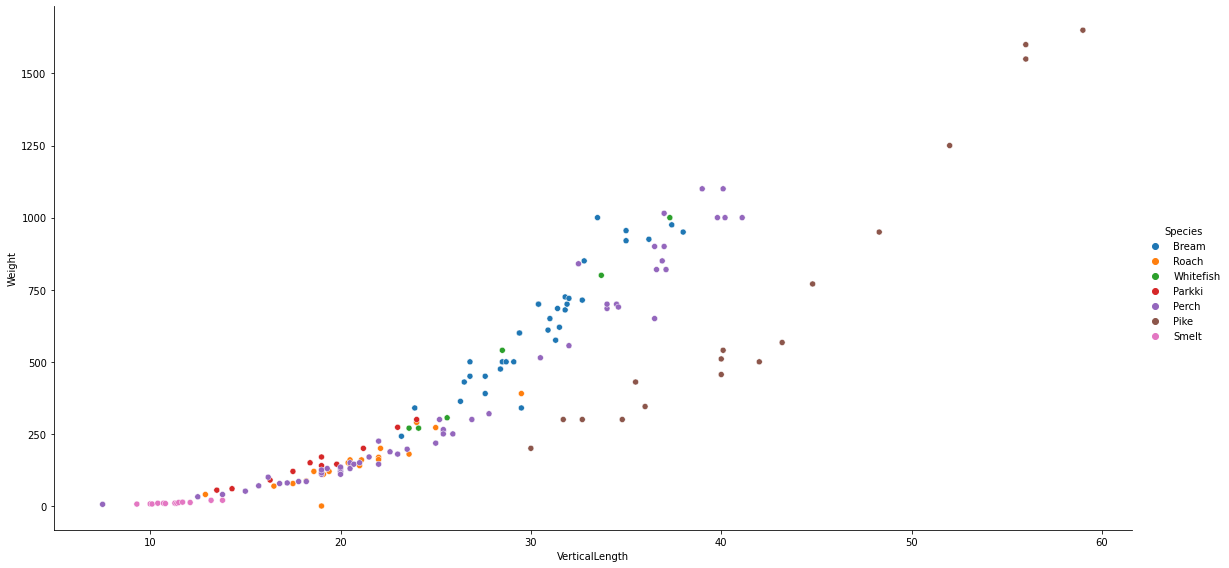

In [8]:
# 9 create the same scatterplot as the previous cell, but use color to identify each species

sns.relplot(data = fish, x = 'VerticalLength', y = 'Weight', hue = 'Species', height = 8, aspect =2);

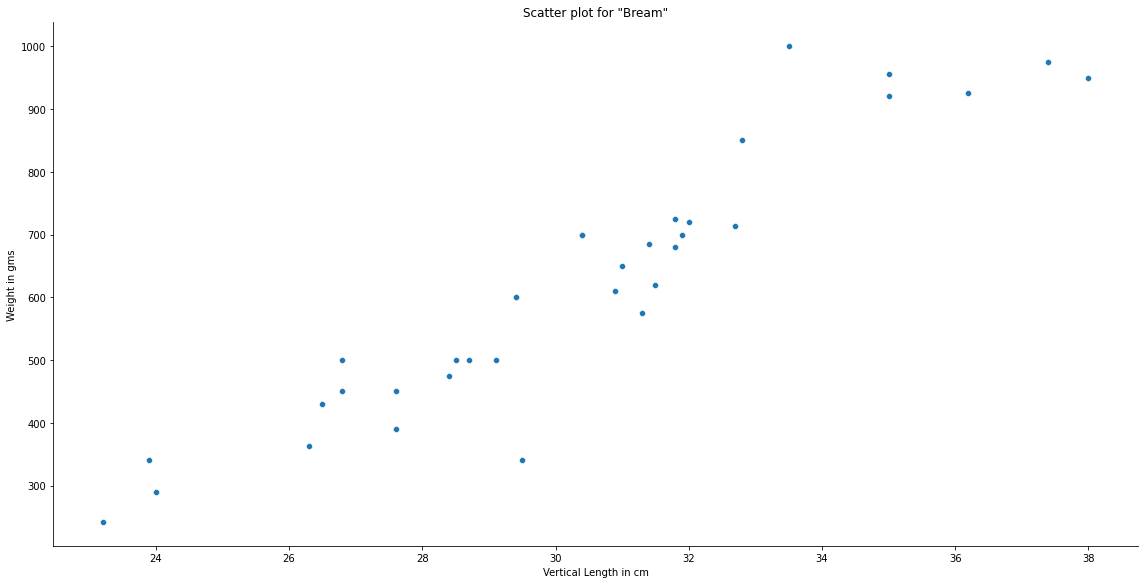

In [9]:
# 10 create the same scatterplot as the previous cell, but only display data for the Bream species

ax = sns.relplot(data = fish.query('Species == "Bream"'), x = 'VerticalLength', y = 'Weight', height = 8, aspect =2)

ax.set(title = 'Scatter plot for "Bream"', xlabel = 'Vertical Length in cm', ylabel = 'Weight in gms');

## Create a linear model

In [10]:
# 11 use the correlation data to choose an independent variable



In [11]:
# 12 filter the DataFrame so it only contains the values for the Bream species 
#      and assign the resulting DataFrame to a variable named bream

bream = fish.query('Species == "Bream"')

bream.head()

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [12]:
# 13 use the train_test_split() method to split the training and testing data

x_train, x_test, y_train, y_test = train_test_split(
bream[['VerticalLength']], bream[['Weight']])

In [13]:
# 14 create the model and fit the training data

fishModel = LinearRegression()
fishModel.fit(x_train, y_train)

LinearRegression()

In [14]:
# 15 score the testing data
fishModel.score(x_test, y_test)

0.864276125179912

In [15]:
# 16 make the predictions and store the results in a DataFrame

y_predicted = fishModel.predict(x_test)

predicted = pd.DataFrame(y_predicted, columns = ['PredictedWeight'])

predicted.head()

,PredictedWeight
0,927.909149
1,247.436650
2,524.860053
3,786.580246
4,477.750419


## Plot the regression line

In [16]:
# 17 join the column for the predicted data with the columns for the original 
#      data, assign the resulting DataFrame to the variable named final

final = predicted.join([x_test.reset_index(drop = True),
                        y_test.reset_index(drop = True)])

final.head()

,PredictedWeight,VerticalLength,Weight
0,927.909149,36.2,925.0
1,247.436650,23.2,242.0
2,524.860053,28.5,500.0
3,786.580246,33.5,1000.0
4,477.750419,27.6,390.0


In [17]:
# rename the Weight column to ActualWeight for clarity.

final.rename(columns = {'Weight': 'ActualWeight'}, inplace = True)

final.head()

,PredictedWeight,VerticalLength,ActualWeight
0,927.909149,36.2,925.0
1,247.436650,23.2,242.0
2,524.860053,28.5,500.0
3,786.580246,33.5,1000.0
4,477.750419,27.6,390.0


In [18]:
# 18 melt the actual and predicted values into a column named Variable and
#      Value, and assign the resulting DataFrame to a varialbe named finalMelt

finalMelt = pd.melt(final, id_vars = ['VerticalLength'], 
                   value_vars = ['ActualWeight', 'PredictedWeight'],
                   var_name = 'Variable', value_name = 'Value')

finalMelt.head()


,VerticalLength,Variable,Value
0,36.2,ActualWeight,925.0
1,23.2,ActualWeight,242.0
2,28.5,ActualWeight,500.0
3,33.5,ActualWeight,1000.0
4,27.6,ActualWeight,390.0


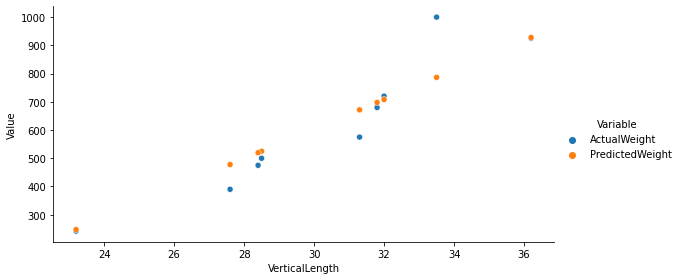

In [19]:
# 19 use relplot() method to create a scatter plot that plots the actual 
#     the predicted data values. Make sure to use a different color for actual and 
#     predicted valuse.

sns.relplot(data = finalMelt, x = 'VerticalLength', y = 'Value', hue = 'Variable', height = 4, aspect = 2);

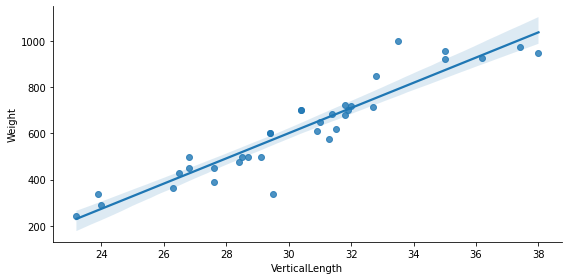

In [20]:
# 20 use lmplot() to produce a similar plot.
#      NOTE: use the DataFrame named bream with this method

sns.lmplot(data = bream, x = 'VerticalLength', y = 'Weight', height = 4, aspect = 2);


## Plot the residuals

In [21]:
# 21 calculate the residuals and add them to a new column int the DataFrame named final.

final['Residuals'] = final.ActualWeight - final.PredictedWeight


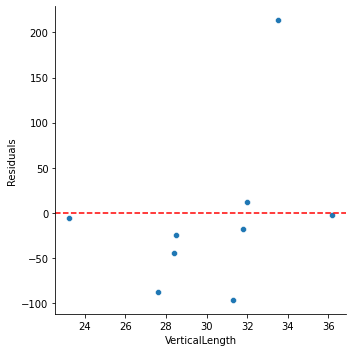

In [22]:
# 22 use relplot() to create a scatter plot, that plots the residuals, and use the 
#     axhline() method to improve your plot.

g = sns.relplot(data = final, x = 'VerticalLength', y = 'Residuals')

for ax in g.axes.flat:
    ax.axhline(0, ls = '--', color = 'red');

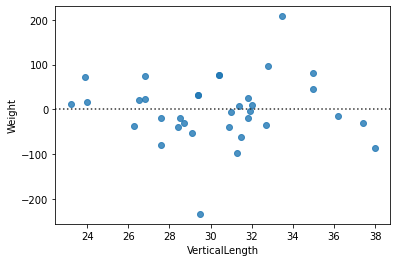

In [23]:
# 23 use residplot() to produce a similar plot.
#      NOTE: use the DataFrame named bream with this method

sns.residplot(data = bream, x = 'VerticalLength', y = 'Weight');